In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('dataset/games.csv')

# Análise

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [8]:
df.corr(numeric_only=True)
# primeira análise: a correlação entre as vendas dos EUA e da Europa é de 0.76 (alta), 
# o que significa que se um jogo vende bem nos EUA, ele provavelmente venderá bem na Europa (e vice-versa). 

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
Year_of_Release,1.000000,-0.092500,0.003978,-0.168366,0.037820,0.011411
NA_sales,-0.092500,1.000000,0.765335,0.449594,0.638649,0.240755
EU_sales,0.003978,0.765335,1.000000,0.435061,0.722792,0.220752
JP_sales,-0.168366,0.449594,0.435061,1.000000,0.291089,0.152593
Other_sales,0.037820,0.638649,0.722792,0.291089,1.000000,0.198554
Critic_Score,0.011411,0.240755,0.220752,0.152593,0.198554,1.000000


# Nomes das Colunas

In [9]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

# Valores Ausentes

In [10]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [11]:
# retirando as 2 linhas com valores nulos no campo 'Name', pois é um campo importante para a análise
df = df.dropna(subset=['name'])

In [12]:
df.isna().sum() 
# analisando como posso tratar os valores nulos

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

In [13]:
df['platform'].value_counts()

platform
PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64

In [14]:
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [15]:
df[(~df['year_of_release'].isna()) & (df['platform'] == 'PS2')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
17,Grand Theft Auto: San Andreas,PS2,2004.0,Action,9.43,0.40,0.41,10.57,95.0,9,M
24,Grand Theft Auto: Vice City,PS2,2002.0,Action,8.41,5.49,0.47,1.78,95.0,8.7,M
28,Gran Turismo 3: A-Spec,PS2,2001.0,Racing,6.85,5.09,1.87,1.16,95.0,8.4,E
38,Grand Theft Auto III,PS2,2001.0,Action,6.99,4.51,0.30,1.30,97.0,8.5,M
48,Gran Turismo 4,PS2,2004.0,Racing,3.01,0.01,1.10,7.53,89.0,8.5,E
...,...,...,...,...,...,...,...,...,...,...,...
16670,Sugar + Spice! Anoko no Suteki na Nanimokamo,PS2,2008.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16671,Kanokon: Esuii,PS2,2008.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16683,Scarlett: Nichijou no Kyoukaisen,PS2,2008.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16689,Real Rode,PS2,2008.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN


In [16]:
# preenchendo os valores nulos de 'year_of_release' com a mediana dos anos de lançamento dos jogos de cada plataforma
df['year_of_release'] = df.groupby('platform')['year_of_release'].transform(lambda x: x.fillna(x.median()))

In [17]:
# preenchendo tbd (abreviação para "a ser determinda") com None
df['user_score'] = df['user_score'].replace('tbd', None)

In [18]:
df['rating'].value_counts()

rating
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: count, dtype: int64

In [19]:
# filtrando as linhas em que todos os dados de feedback estão ausentes
df[(df['critic_score'].isna()) & (df['user_score'].isna()) & (df['rating'].isna())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [20]:
# criando um novo dataframe com apenas as linhas que possuem pelo menos uma das informações de avaliação preenchida
df_feedback = df[(~df['critic_score'].isna()) | (~df['user_score'].isna()) | (~df['rating'].isna())]

In [21]:
df_feedback.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       1911
user_score         2458
rating               99
dtype: int64

In [22]:
# essa linha continha um erro, um jogo de nitendo DS lançado em 1980, sendo que o console foi lançado em 2004
df = df.drop(15957)

# Tipos de Colunas

In [23]:
# transformando os dados da coluna 'user_score' para float
df['user_score'] = df['user_score'].astype(float)

In [24]:
# transformando os dados da coluna 'year_of_release' para int
df['year_of_release'] = df['year_of_release'].astype(int)

# Novas Colunas

In [25]:
# criando coluna com o total de vendas do mundo todo
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df['total_sales'] = df['total_sales'].round(2)

# Erros

### Foi um erro retirar todas as linhas em que os 3 dados de feedback estão ausentes (user_score, critic_score e rating) pois afetou profundamente os gráficos. Veja a diferença dos 2 gráficos abaixo:

##### Antes:

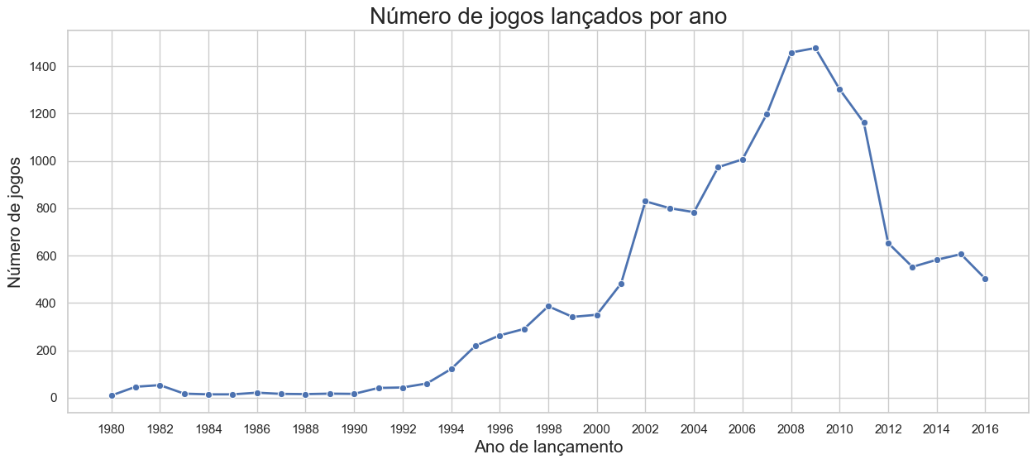

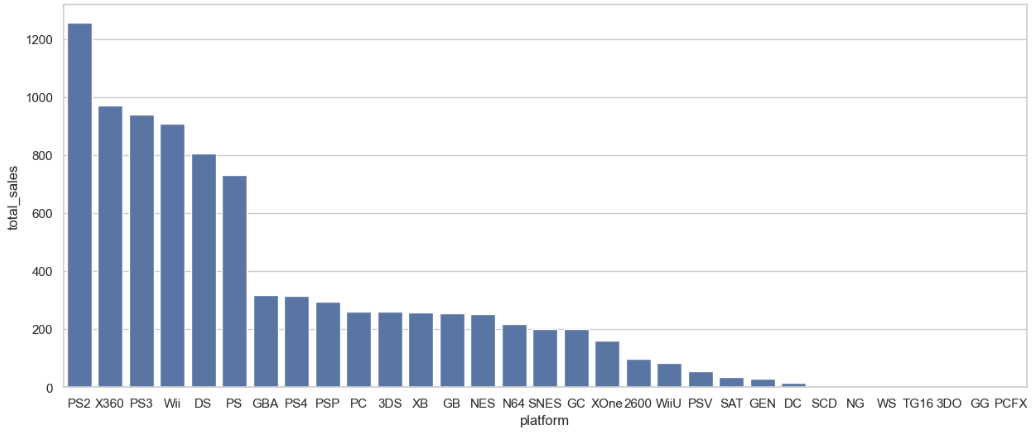

#### Depois

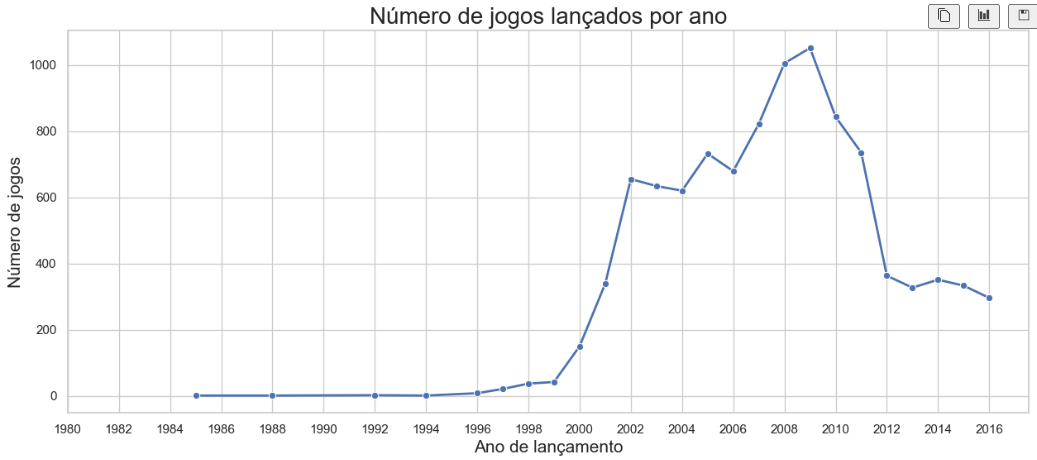

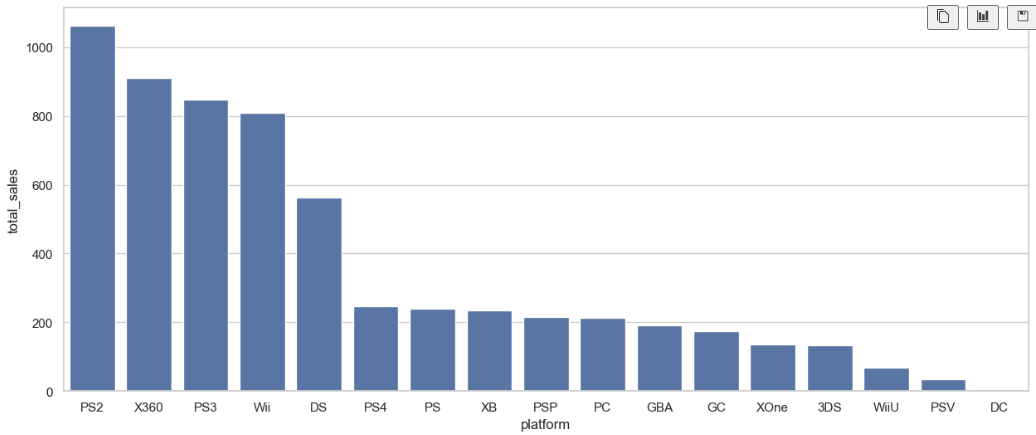

### Os dados foram afetados significativamente. Todos os dados de 1984 para baixo foram apagados, a vendas do console "PS" diminuíram drasticamente e inúmeros consoles deixaram de existir. Por isso, decidi deixar os dados das colunas 'user_score', 'critic_score' e 'rating' em branco, do jeito que estavam.

# Análises

## Quantidade de jogos feitos por ano

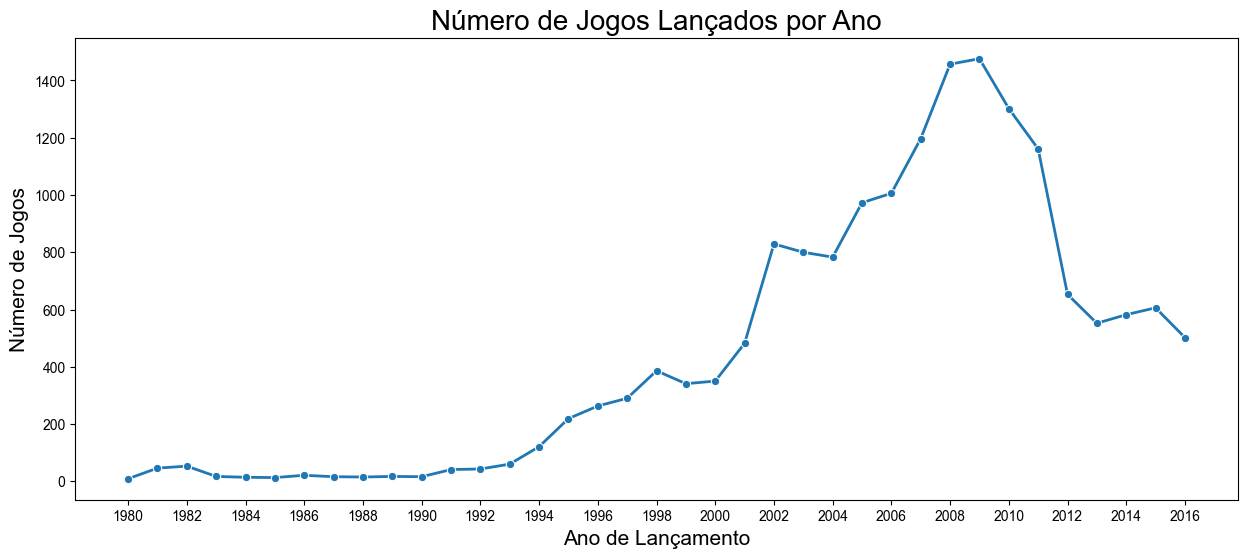

In [26]:
# Gráfico de lançamentos de jogos por ano
games_per_year = df.groupby('year_of_release')['name'].count().reset_index()

plt.figure(figsize=(15, 6))
sns.lineplot(data=games_per_year, x='year_of_release', y='name', marker='o', linewidth=2) 

sns.set(style='whitegrid')
plt.title('Número de Jogos Lançados por Ano', fontsize=20)
plt.xlabel('Ano de Lançamento', fontsize=15)
plt.ylabel('Número de Jogos', fontsize=15)
plt.xticks(range(1980, 2017, 2))
plt.show()

## Vendas Totais por Plataforma

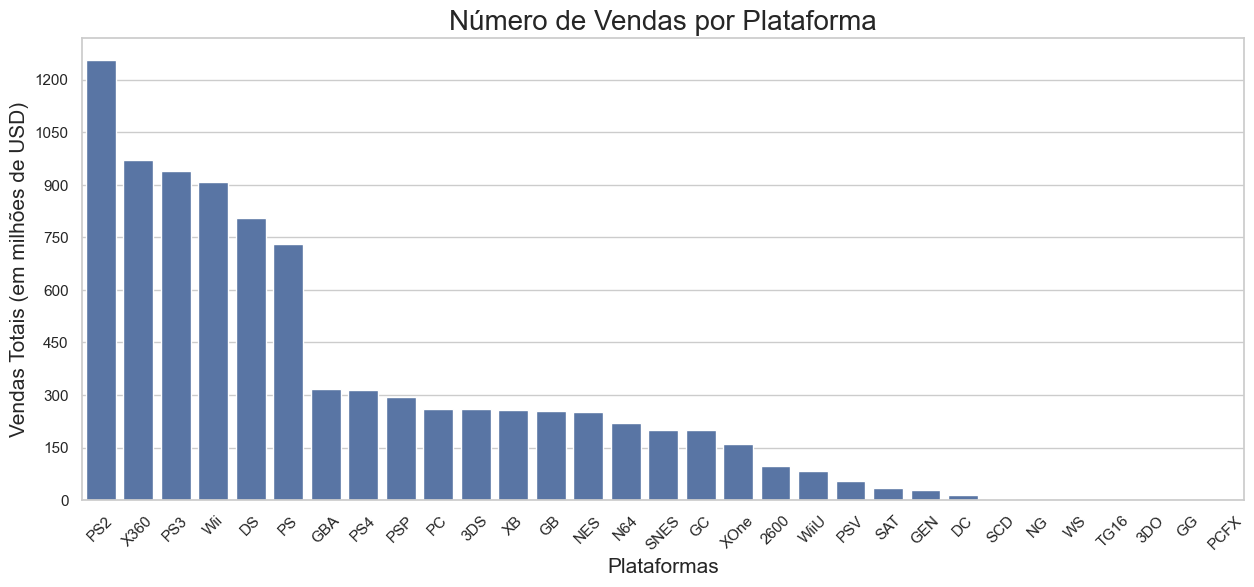

In [27]:
# Gráfico de vendas por plataforma
platform_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(15, 6))
sns.barplot(data=platform_sales, x='platform', y='total_sales')

sns.set(style='whitegrid')
plt.title('Número de Vendas por Plataforma', fontsize=20)
plt.xlabel('Plataformas', fontsize=15)
plt.ylabel('Vendas Totais (em milhões de USD)', fontsize=15)
plt.xticks(rotation=45)
plt.yticks(range(0, 1300, 150))
plt.show()

## Plataformas X Ano X Vendas

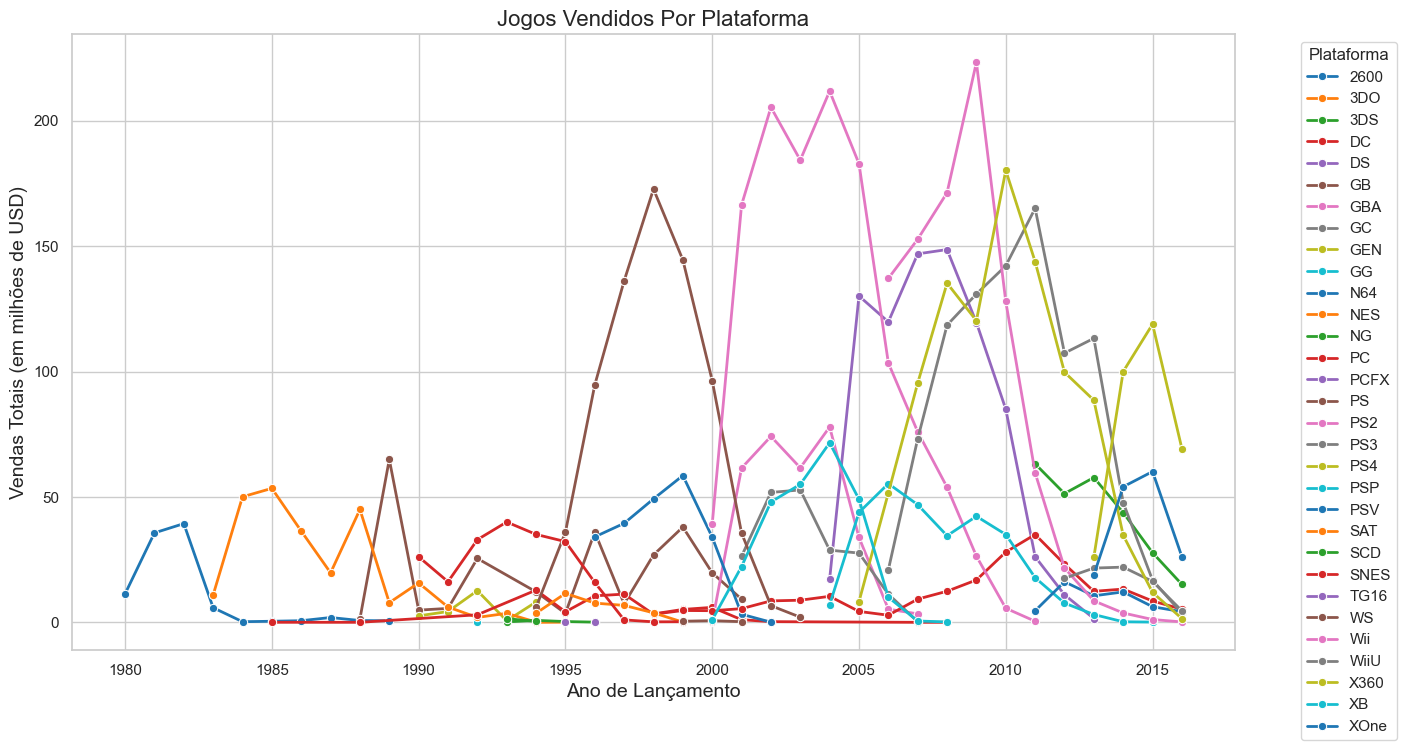

In [28]:

platform_sales2 = df.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

# Criar o gráfico de barras agrupadas
plt.figure(figsize=(15, 8))
sns.lineplot(data=platform_sales2, x='year_of_release', y='total_sales', hue='platform', marker='o', linewidth=2, palette='tab10')

# Ajustes estéticos
plt.title('Jogos Vendidos Por Plataforma', fontsize=16)
plt.xlabel('Ano de Lançamento', fontsize=14)
plt.ylabel('Vendas Totais (em milhões de USD)', fontsize=14)
plt.legend(title='Plataforma', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

### O gráfico acima ficou bastante confuso, ele foi feito apenas para uma análise própria e geral.

## TOP 5 Plataformas

In [29]:
# filtrando as 5 plataformas com mais vendas
top_platforms = platform_sales.nlargest(5, 'total_sales')['platform']

df_top_platforms = df[df['platform'].isin(top_platforms)]

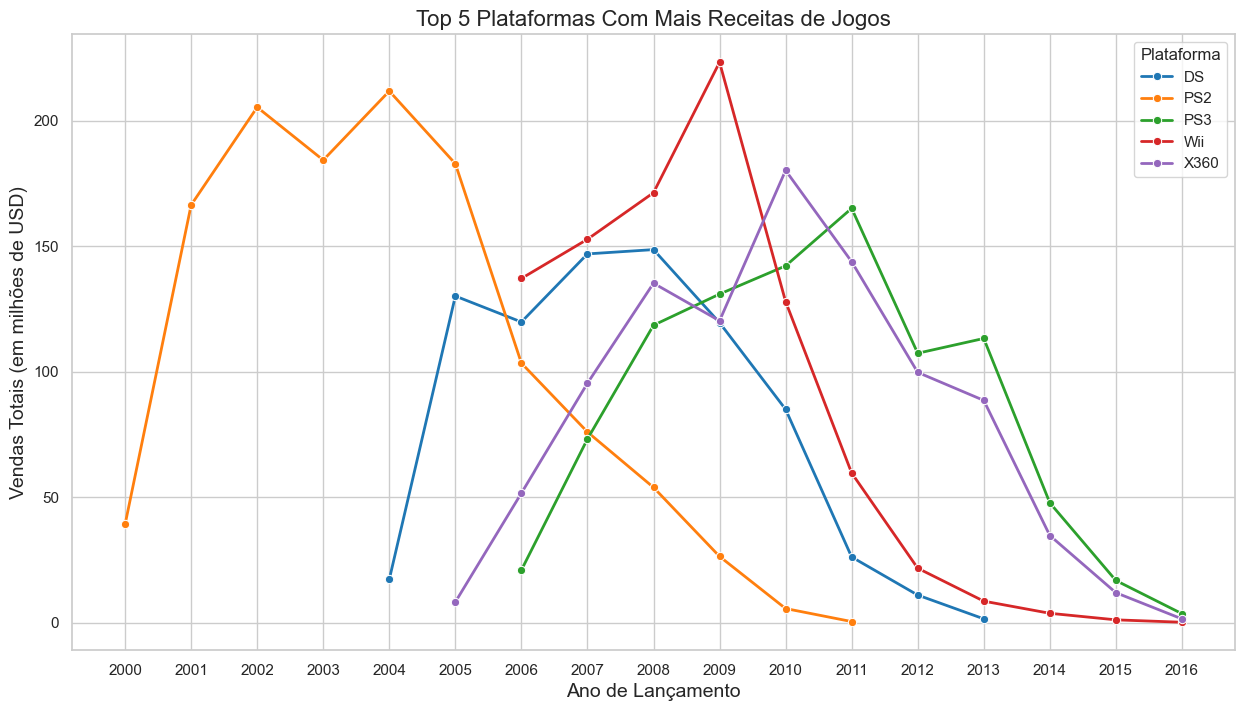

In [30]:
# agrupamento
top5 = df_top_platforms.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

# gráfico
plt.figure(figsize=(15, 8))
sns.lineplot(data=top5, x='year_of_release', y='total_sales', hue='platform', marker='o', linewidth=2, palette='tab10')

# style
plt.title('Top 5 Plataformas Com Mais Receitas de Jogos', fontsize=16)
plt.xlabel('Ano de Lançamento', fontsize=14)
plt.ylabel('Vendas Totais (em milhões de USD)', fontsize=14)
plt.legend(title='Plataforma')
plt.xticks(range(2000, 2017, 1))
plt.grid(True)

plt.show()

### *Analisando os dois gráficos acima, é de fácil percepção que um console dura em média 10 anos até chegar a menos de 1M de receita. Ainda analisando os 2 gráficos, a partir do 5° ano, o console começa a decair até chegar ao seu 10° ano. <br> Obs: o PC (computador) não entra nessa regra pois ele está há mais de 30 anos no mercado. Sendo que ele engloba todos os computadores, ou seja, colocássemos todos os consoles como "video games" também teriam muitos anos de mercado.*

## Escolha de Dados

In [31]:
# decidi trabalhar apenas com os dados dos anos de 2006 a 2016 e com as plataformas que ainda estão ativas
df_predict = df[(df['year_of_release'] >= 2006) & (df['year_of_release'] <= 2016)]

plataformas_ativas = df_predict[df_predict['year_of_release'] == 2016]['platform'].unique()

df_predict = df_predict[df_predict['platform'].isin(plataformas_ativas)]

## Gráfico de Linha 2006 - 2016

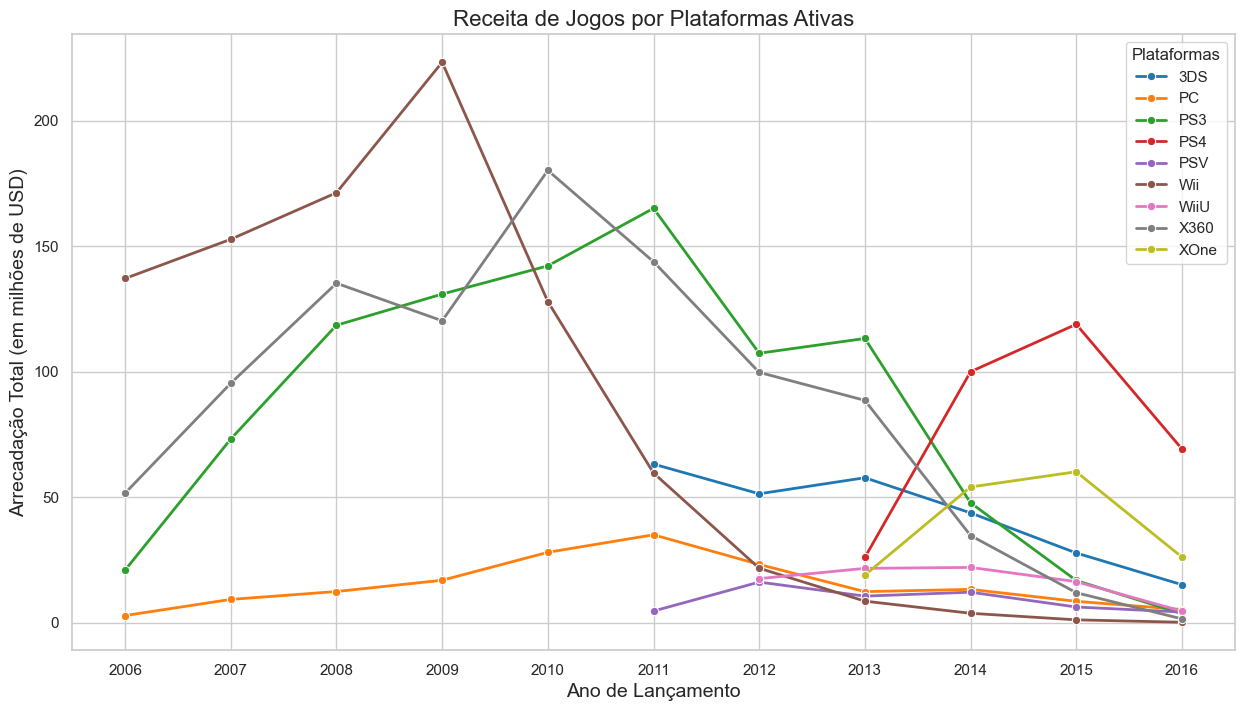

In [32]:
vendas_recentes = df_predict.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()


plt.figure(figsize=(15, 8))
sns.lineplot(data=vendas_recentes, x='year_of_release', y='total_sales', hue='platform', marker='o', linewidth=2, palette='tab10')


plt.title('Receita de Jogos por Plataformas Ativas', fontsize=16)
plt.xlabel('Ano de Lançamento', fontsize=14)
plt.ylabel('Arrecadação Total (em milhões de USD)', fontsize=14)
plt.legend(title='Plataformas')
plt.xticks(range(2006, 2017, 1))
plt.grid(True)

plt.show()

#### *1. As plataformas "PS3", "X360" e "WII" provavelmente irão deixar de lançar jogos nos anos seguintes, pois ja estão há 10 anos no mercado e esse é o "limite médio" que definimos para uma plataforma desaparecer.* <br> *2. Por outro lado, os consoles "PS4" e "XOne" lideram mercado de jogos e provavelmente continuarão vendendo, no mínimo, até 2023 (2013 + 10).* <br> *3. O console "PS4" é a plataforma que mais vende jogos no ano atual (2016) com muita sobra. Até um novo console ser lançado, provavelmente continuará assim o mercado.* <br> *4. O "3DS" é o terceiro em números de vendas e foi lançado dois anos antes que os 2 líderes.* <br> *5. Por fim, o mercado em geral está em baixa, todas as plataformas estão em queda ou perto do 0.*

## Boxplot Total Sales

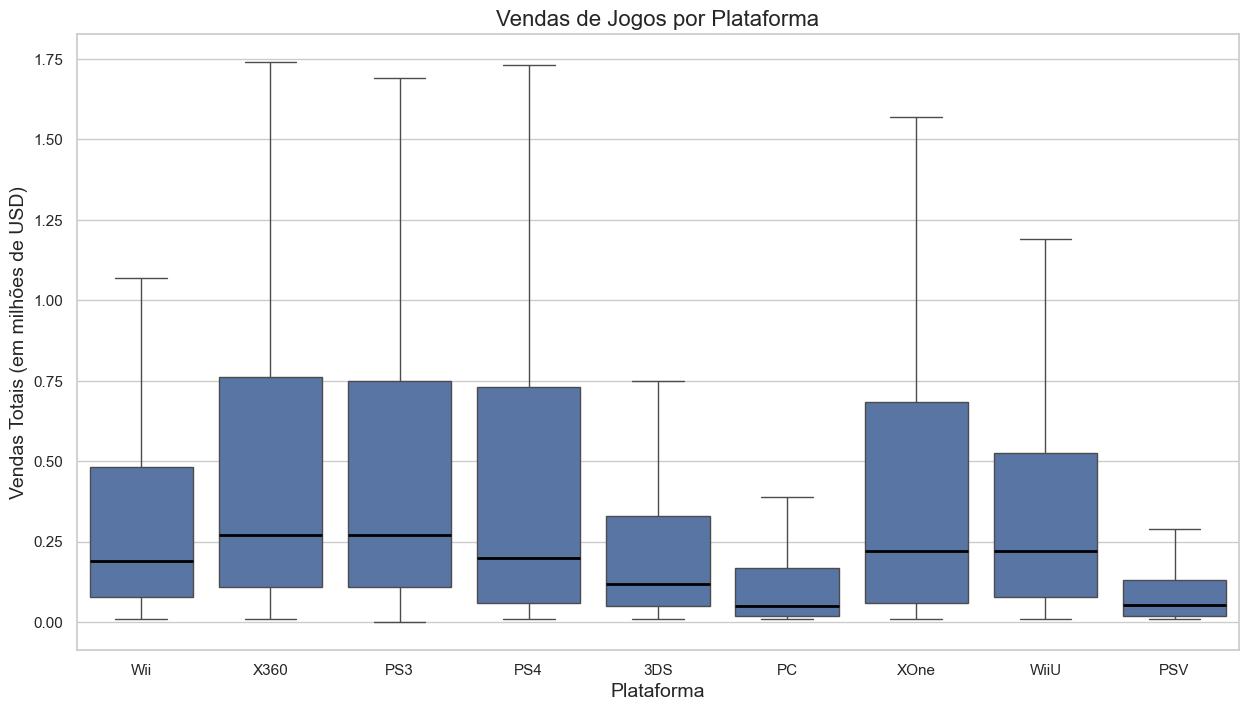

In [46]:
plt.figure(figsize=(15, 8))
# boxplot sem outliers
sns.boxplot(data=df_predict, x='platform', y='total_sales', 
            showfliers=False, medianprops={'color': 'black', 'linewidth': 2})


plt.title('Vendas de Jogos por Plataforma', fontsize=16)
plt.xlabel('Plataforma', fontsize=14)
plt.ylabel('Vendas Totais (em milhões de USD)', fontsize=14)
plt.show()

#### *1. Ao analisar separadamente as franquias PS e X, é de fácil percepção que a mediana (linha preta) da arrecadação dos jogos das novas versões diminuiu consideravelmente. Enquanto o X360 e o PS3 estavam com a mediana acima de 0.25 milhão, ou seja, mais de 250 mil dólares por jogo, as novas versões (PS4 e XOne) estão abaixo. Pode-se dizer que um fator relevante é o lançamento recente dos consoles, ambos tem apenas 3 anos de mercado.* <br><br> *2. Com o BoxPlot, fica mais fácil de enxergar que o "3DS" e o "PSV" possuem arrecadação inferior aos líderes do mercado, sendo que eles foram lançados anteriormente a eles. Ou seja, 3DS e PSV em tese, ainda teriam no mínimo 5 anos de jogos sendo lançados (de acordo com a nossa análise). No entanto, também analisamos que eles estão com vendas muito abaixo da média do mercado (principalmente o PSV), então, é possível que os 2 sejam descontinuados antes do previsto*

#### Obs: Os outliers foram removidos para facilitar e deixar a análise mais fidedígna. Abaixo, está a representação do gráfico com os outliers.

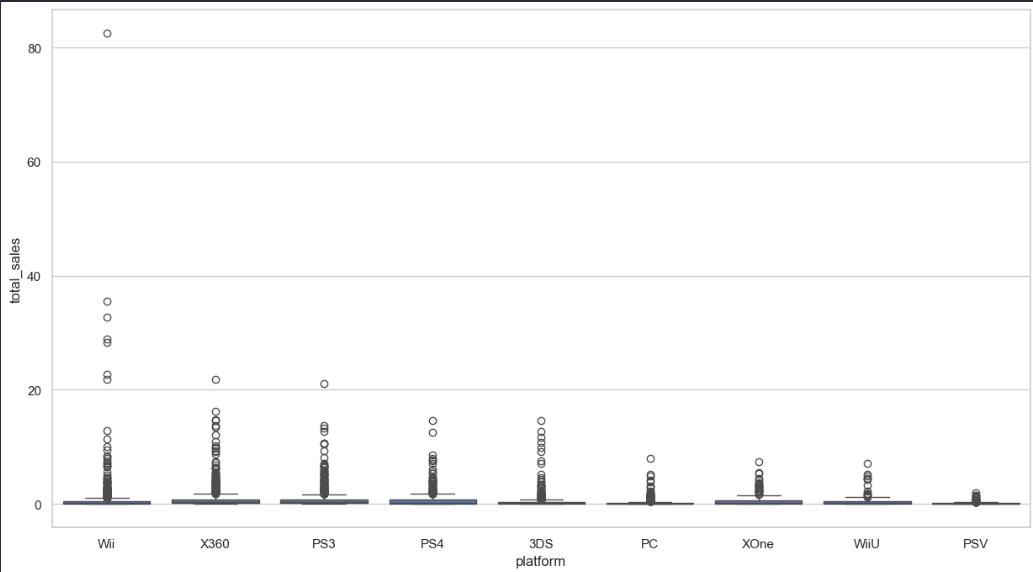